In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import sys
import urllib.request

In [2]:
pip --version

pip 22.0.2 from C:\Users\User\anaconda3\envs\deep_env\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [10]:
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

In [11]:
sys.version_info

sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0)

In [12]:
%matplotlib inline

#### Example: Liniar regression fit

In [30]:
np.random.seed(987654321)

In [35]:
x = np.arange(100)
y = 0.5*x - 20 + np.random.randn(len(x))
df = pd.DataFrame({"x":x, "y":y})
df

,x,y
0,0,-20.121785
1,1,-20.803516
2,2,-18.832582
3,3,-18.120572
4,4,-16.471556
...,...,...
95,95,28.416396
96,96,28.058648
97,97,29.382809
98,98,28.606235


<AxesSubplot:xlabel='x', ylabel='y'>

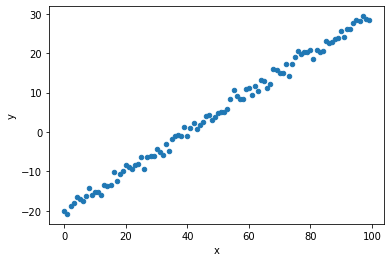

In [36]:
df.plot.scatter(x="x",y="y")

#### fit the model

In [37]:
model = sm.ols('y~x', data=df).fit()
model

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.715e+04
Date:                Tue, 01 Feb 2022   Prob (F-statistic):          7.50e-112
Time:                        11:59:35   Log-Likelihood:                -150.71
No. Observations:                 100   AIC:                             305.4
Df Residuals:                      98   BIC:                             310.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.9458      0.219    -91.075      0.000     -20.380     -19.511
x              0.5005      0.004    130.961      0.000       0.493       0.508
==============================================================================
Omnibus:                        0.089   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.255
Skew:                           0.030   Prob(JB):                        0.880
Kurtosis:                       2.760   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Example 2 

In [139]:
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_94.txt'
data = pd.read_csv(url, sep=",", header=None, names=["a", "obesity"])

data.head()


,a,obesity
0,9.21,0
1,7.53,1
2,7.48,1
3,8.08,1
4,8.09,1


In [148]:
lean = data[data.iloc[:,1] == 1]
obese = data[data.iloc[:,1] == 0]

obese.columns = ['obese', 'obesity']
lean.columns = ['lean', 'obesity']

lean.reset_index(drop=True, inplace=True)
obese.reset_index(drop=True, inplace=True)

lean

,lean,obesity
0,7.53,1
1,7.48,1
2,8.08,1
3,8.09,1
4,10.15,1
5,8.40,1
6,10.88,1
7,6.13,1
8,7.90,1
9,7.05,1


In [151]:
lean.iloc[:,0]
obese.iloc[:,0]

0     9.21
1    11.51
2    12.79
3    11.85
4     9.97
5     8.79
6     9.69
7     9.68
8     9.19
Name: obese, dtype: float64

In [156]:
final_df = pd.concat([lean.iloc[:,0], obese.iloc[:,0]], axis=1)
final_df

,lean,obese
0,7.53,9.21
1,7.48,11.51
2,8.08,12.79
3,8.09,11.85
4,10.15,9.97
5,8.40,8.79
6,10.88,9.69
7,6.13,9.68
8,7.90,9.19
9,7.05,NaN


In [157]:
print(final_df.mean())

lean      8.066154
obese    10.297778
dtype: float64


<AxesSubplot:>

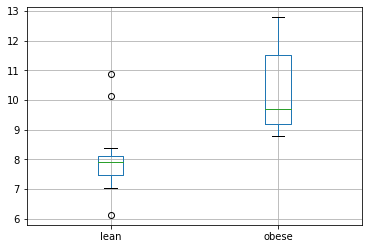

In [158]:
final_df.boxplot()

#### t test

In [162]:
t, p_value = stats.ttest_ind(lean, obese)
t, p_value

(array([-3.94556492,         inf]), array([0.000799, 0.      ]))

# conclusion

##### There is statistical difference between two populatins and their central tendencies, because p_value is below the treshold